In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv("../data/vgsales.csv")

In [64]:
df.shape

(16598, 11)

In [65]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [66]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [67]:
df.info

<bound method DataFrame.info of         Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sal

In [68]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [69]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [70]:
# Dropping rows with missing values
df.dropna(inplace=True)

In [71]:
df["Year"] = df["Year"].astype(int)

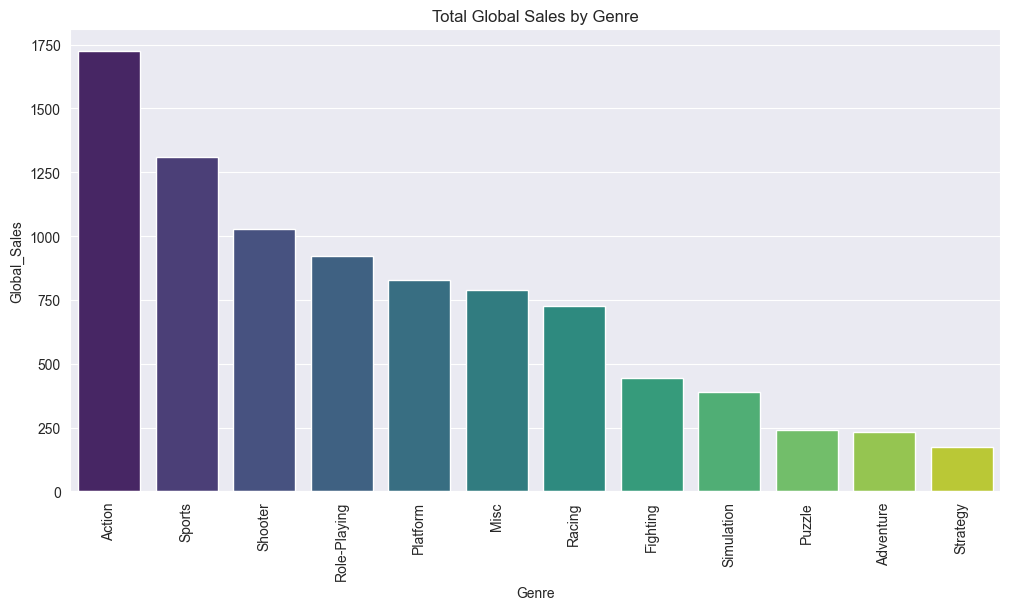

In [77]:
# Sales by genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
genre_sales_df = genre_sales.reset_index()

#Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Global_Sales', data=genre_sales_df, estimator=sum, palette='viridis', hue='Genre', legend=False)
plt.title('Total Global Sales by Genre')
plt.xticks(rotation=90)
plt.show()



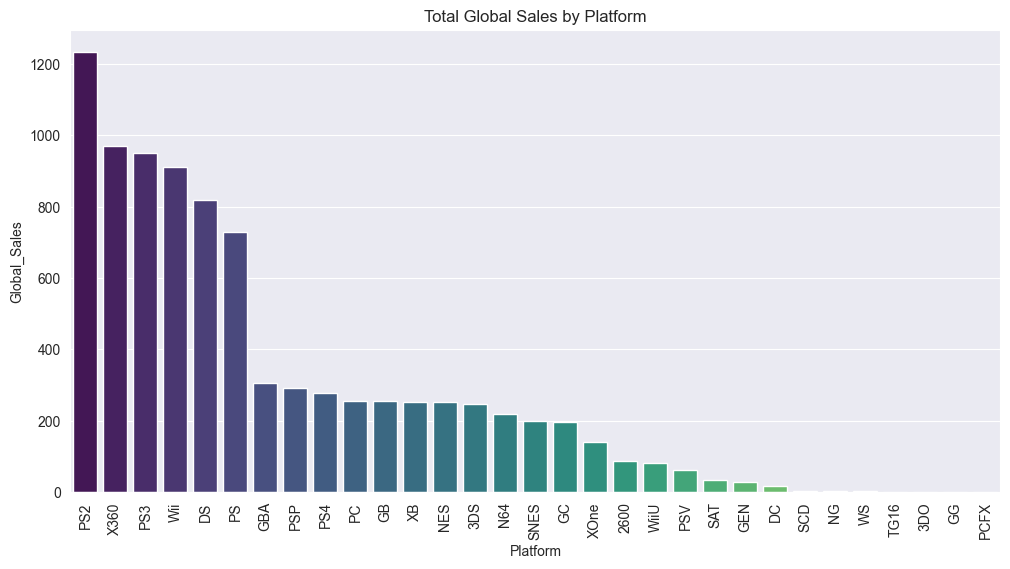

In [78]:
# Sales by platform
sales_platform = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
sales_platform_df = sales_platform.reset_index()

#Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Global_Sales', data=sales_platform_df, estimator=sum, palette='viridis', hue='Platform', legend=False)
plt.title('Total Global Sales by Platform')
plt.xticks(rotation=90)
plt.show()

In [79]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Video Game Sales Data')
plt.show()

ValueError: could not convert string to float: 'Wii Sports'

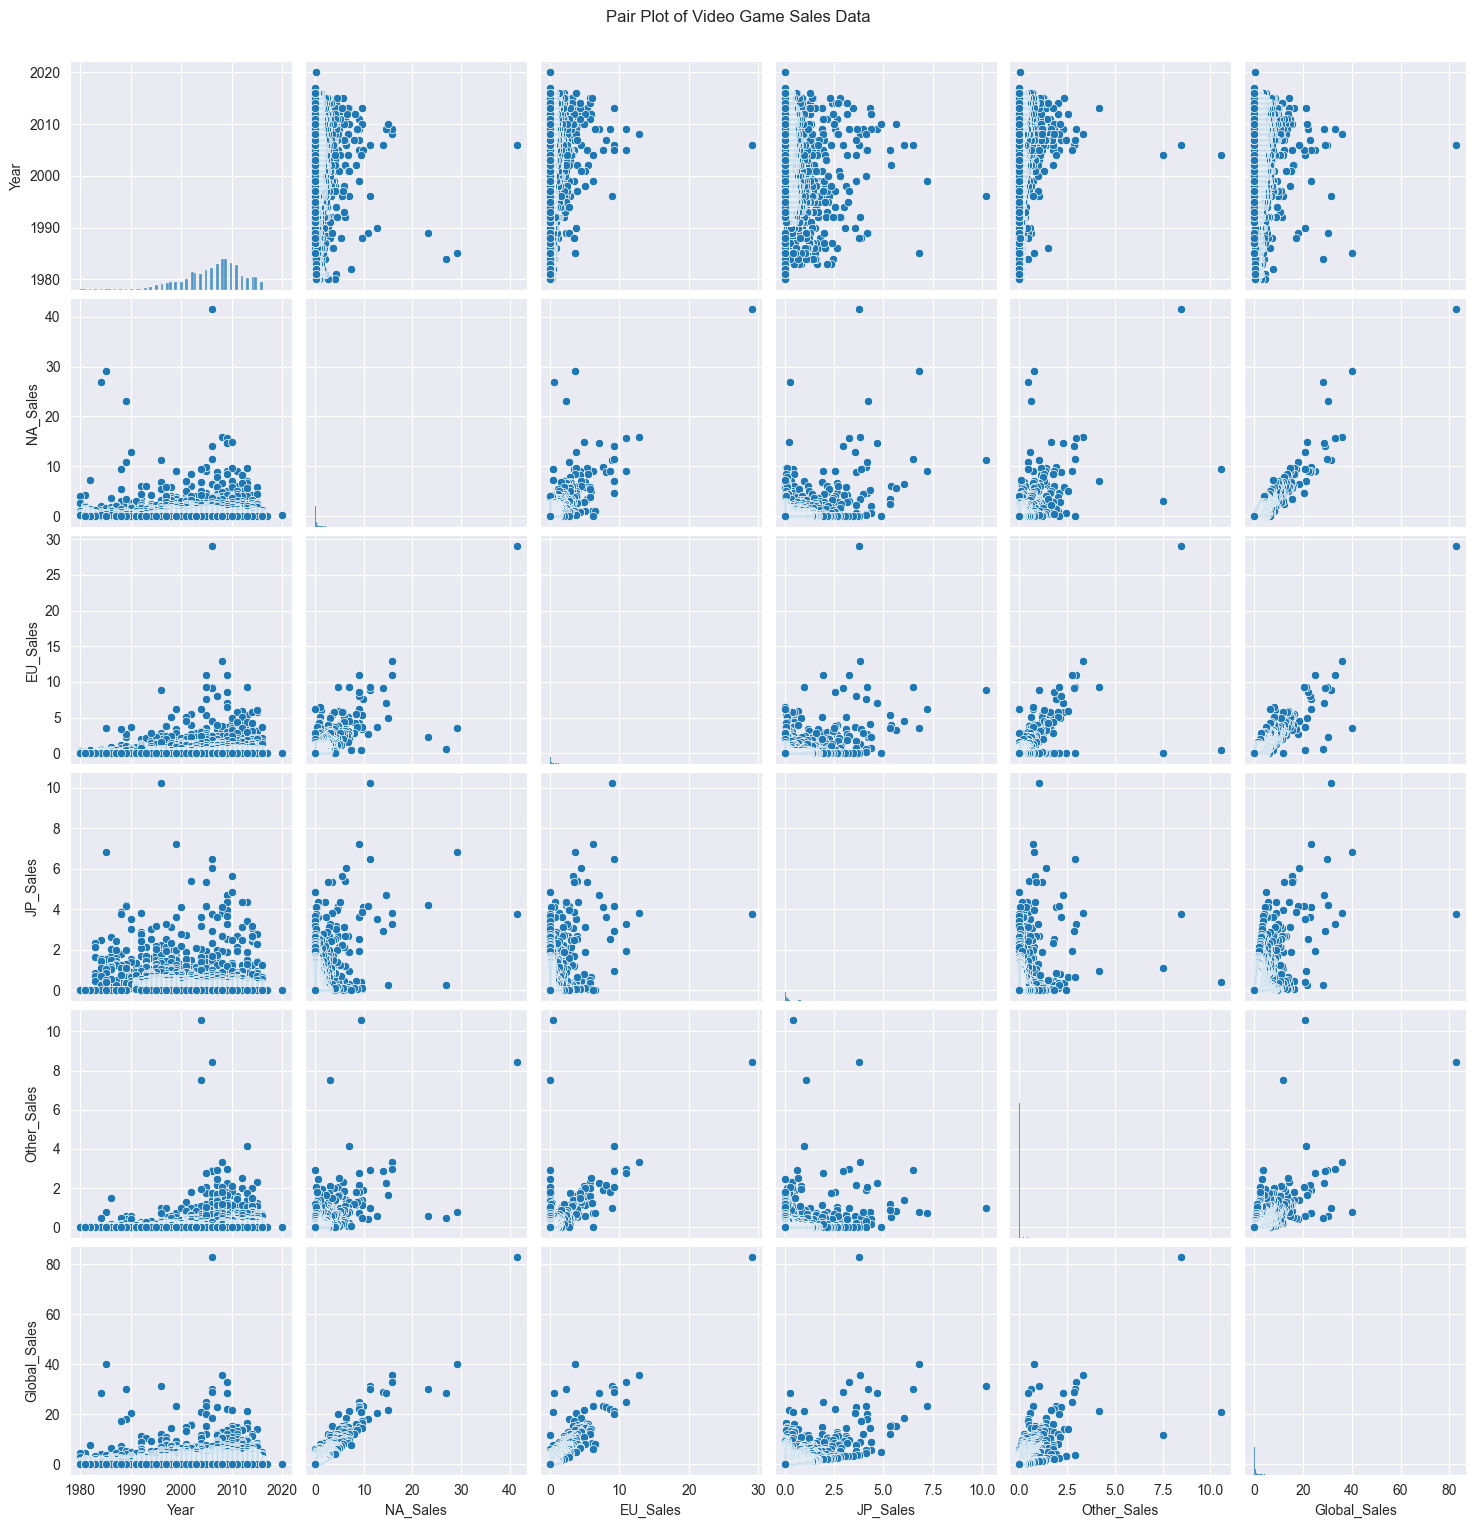

In [81]:
# Select a subset of the dataset for pair plot
subset_df = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

# Plot the pair plot
sns.pairplot(subset_df)
plt.suptitle('Pair Plot of Video Game Sales Data', y=1.02)
plt.show()


/var/folders/n8/zk2hn6mn5rqf_p5z5zcz0_9r0000gn/T/ipykernel_20115/1292943309.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Genre', y='Global_Sales', data=df, palette='viridis')


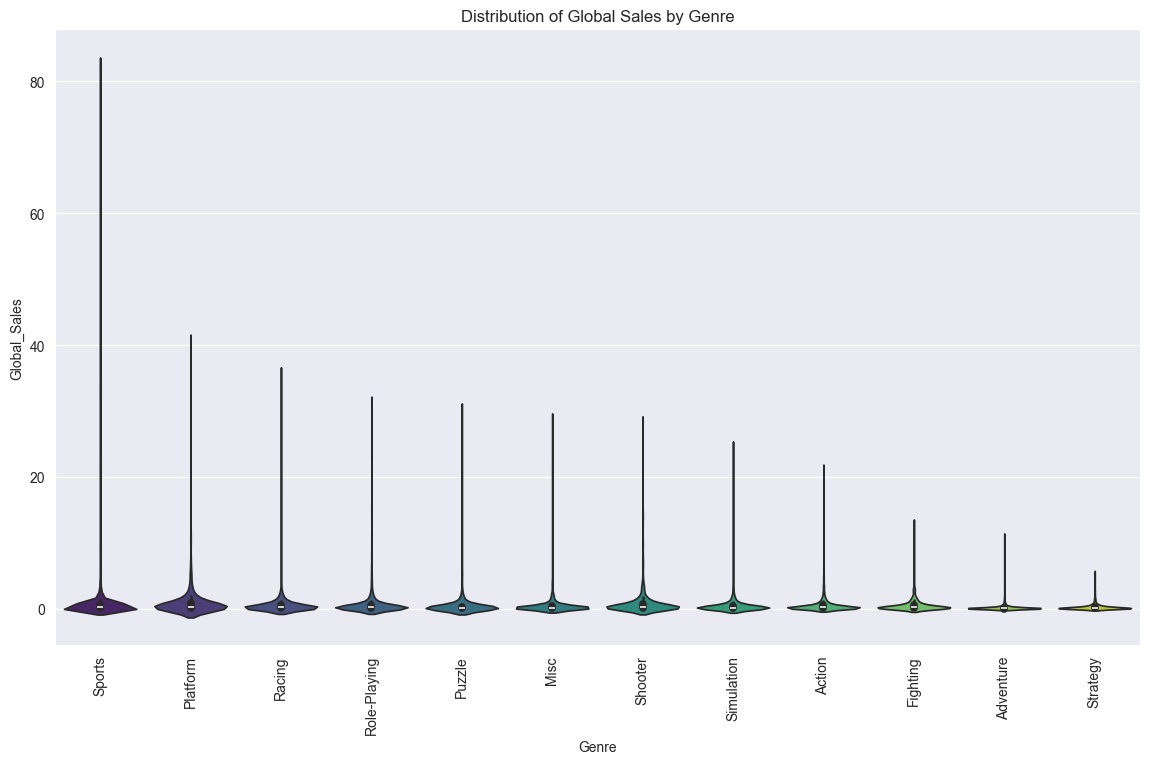

In [83]:
# Plotting the distribution of Global Sales across different Genres
plt.figure(figsize=(14, 8))
sns.violinplot(x='Genre', y='Global_Sales', data=df, palette='viridis')
plt.title('Distribution of Global Sales by Genre')
plt.xticks(rotation=90)
plt.show()

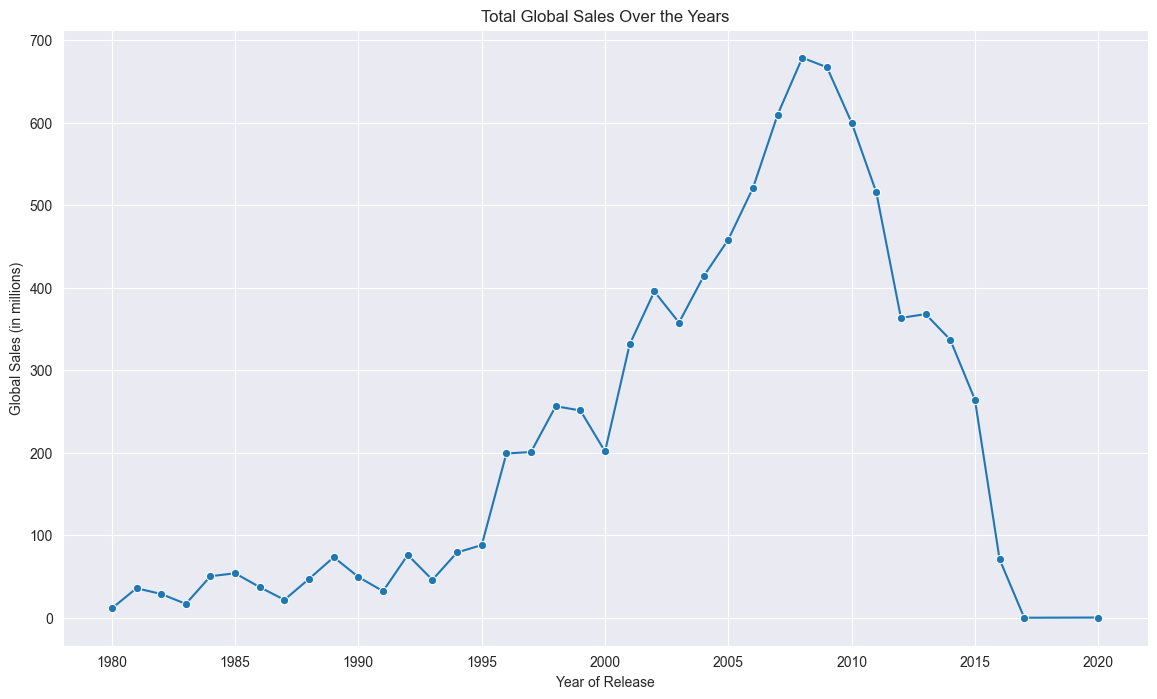

In [88]:
# Aggregating sales data by year
sales_by_year = df.groupby('Year')['Global_Sales'].sum().reset_index()

# Plotting the line plot
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Global_Sales', data=sales_by_year, marker='o')
plt.title('Total Global Sales Over the Years')
plt.xlabel('Year of Release')
plt.ylabel('Global Sales (in millions)')
plt.show()

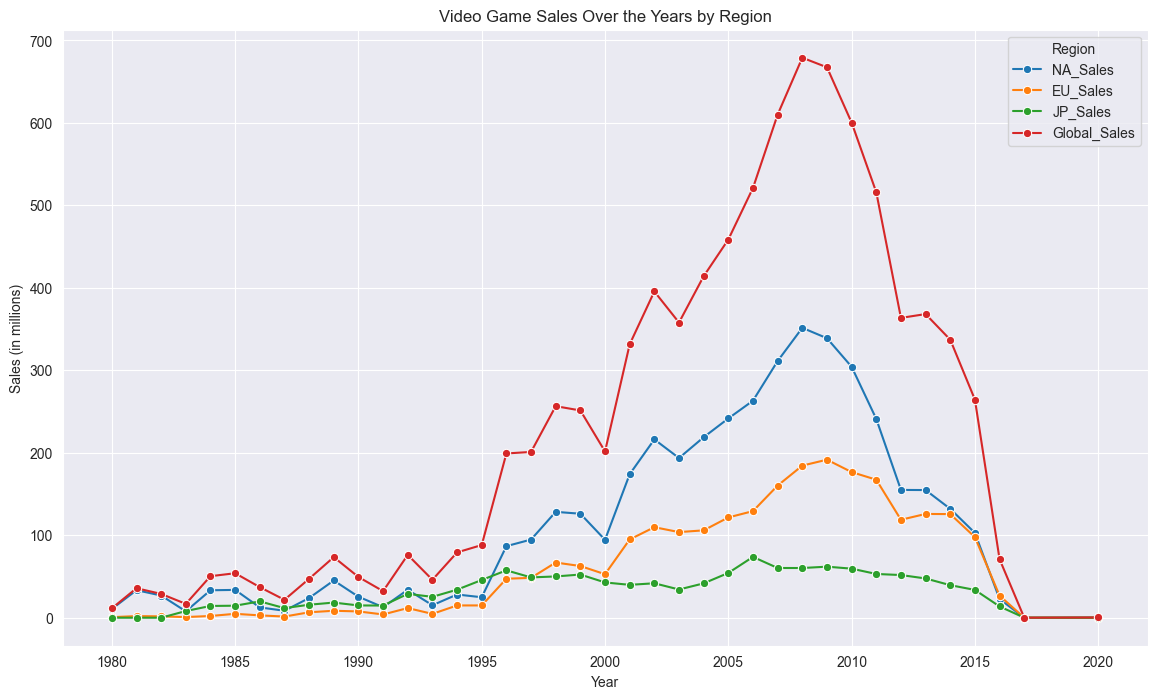

In [90]:
# Creating a FacetGrid to visualize sales across different regions and platforms
sales_by_year_region = df.groupby(['Year'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']].sum().reset_index()

# Melt the DataFrame to long format
sales_long_df = sales_by_year_region.melt(id_vars='Year', var_name='Region', value_name='Sales')

# Plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=sales_long_df, x='Year', y='Sales', hue='Region', palette='tab10', marker='o')
plt.title('Video Game Sales Over the Years by Region')
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.legend(title='Region')
plt.grid(True)
plt.show()

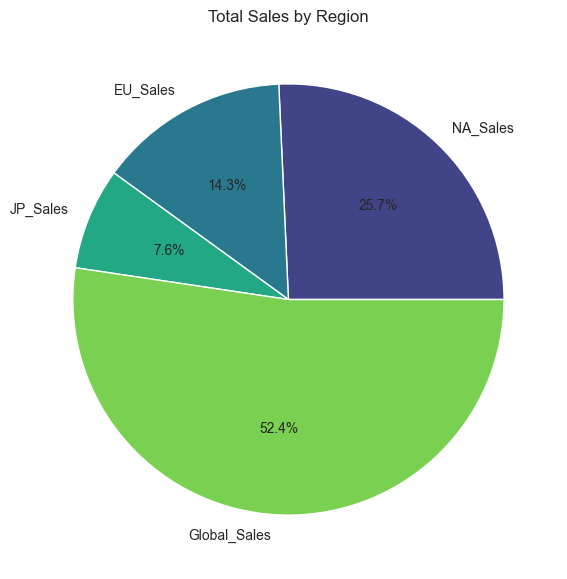

In [91]:
# Aggregate total sales by region
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']].sum()

# Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(region_sales)))
plt.title('Total Sales by Region')
plt.show()

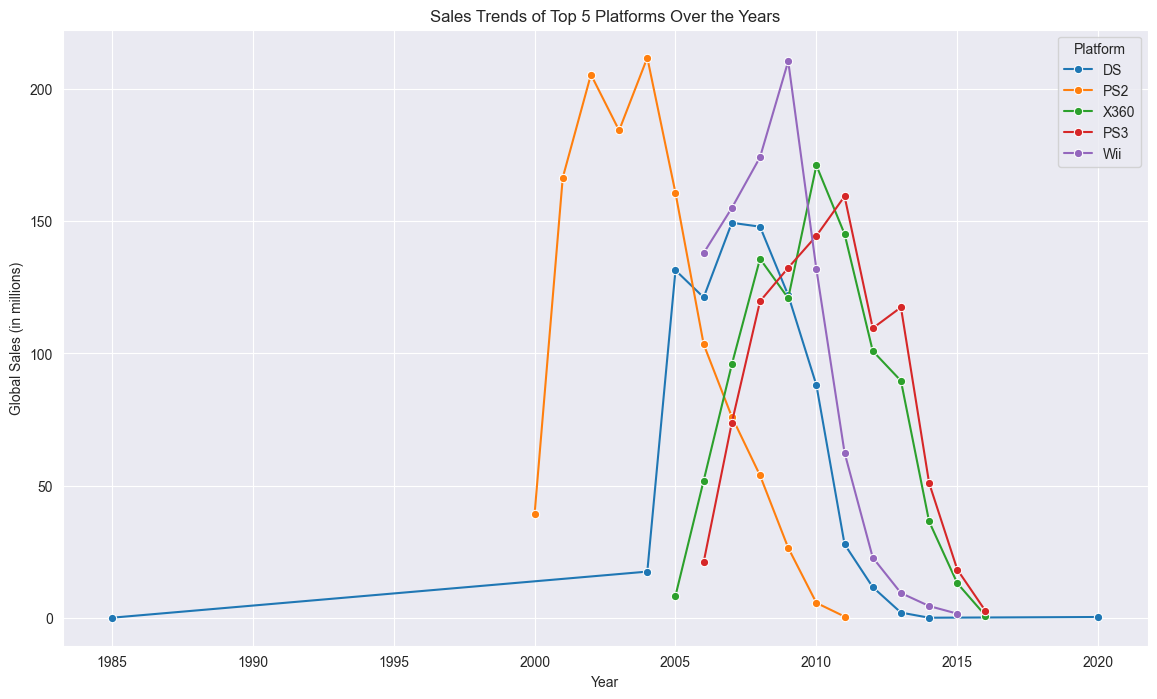

In [95]:
# top 5 platform sales over the years

# Aggregate global sales by year and platform
platform_sales_by_year = df.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()

# Get the top 5 platforms based on total global sales
top_platforms = platform_sales_by_year.groupby('Platform')['Global_Sales'].sum().nlargest(5).index

# Filter the data to include only the top 5 platforms
top_platform_sales = platform_sales_by_year[platform_sales_by_year['Platform'].isin(top_platforms)]

# Plot the data
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_platform_sales, x='Year', y='Global_Sales', hue='Platform', marker='o', palette='tab10')
plt.title('Sales Trends of Top 5 Platforms Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend(title='Platform')
plt.grid(True)
plt.show()

